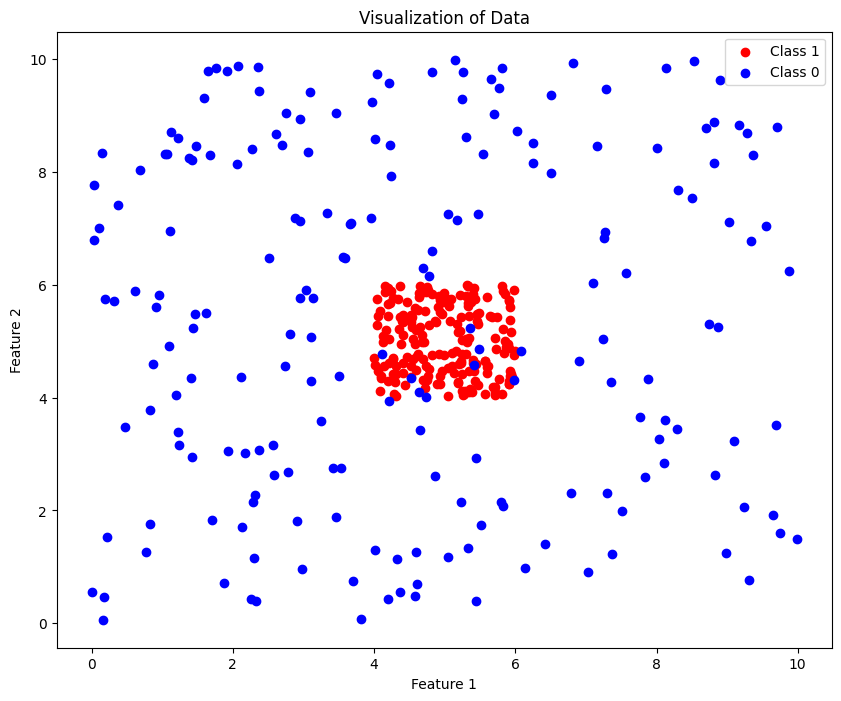

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2025)
a1 = np.random.uniform(4,6,[200,2])
a2 = np.random.uniform(0,10,[200,2])
Data_X = np.vstack((a1,a2))
Data_Y = np.hstack((np.ones(200).T,np.zeros(200).T)).astype(int)

# Visualizing the data
plt.figure(figsize=(10,8))
plt.scatter(Data_X[Data_Y==1,0], Data_X[Data_Y==1,1], color='red', label='Class 1')
plt.scatter(Data_X[Data_Y==0,0], Data_X[Data_Y==0,1], color='blue', label='Class 0')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Visualization of Data')
plt.legend()
plt.show()

In [2]:
class Perceptron():
  def __init__(self, num_features):
    self.num_features = num_features
    self.weights = np.zeros((num_features, 1), dtype=float)
    self.bias = np.zeros(1, dtype=float)

  def forward(self, x):
    linear = np.dot(x, self.weights) + self.bias # comp. net input
    predictions = np.where(linear > 0., 1, 0)
    return predictions

  def backward(self, x, y):
    predictions = self.forward(x)
    errors = y - predictions
    return errors

  def train(self, x, y, epochs):
    for e in range(epochs):
      wrong_predictions = 0
      for i in range (y.shape[0]):
        errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
        if errors.sum() != 0:
          wrong_predictions += 1
        self.weights += (errors * x[i]).reshape(self.num_features, 1)
        self.bias += errors
      print(f"Epoch {e+1}: Number of wrongly predicted training examples: {wrong_predictions}")

  def evaluate(self, x, y):
    predictions = self.forward(x).reshape(-1)
    accuracy = np.sum(predictions == y) / y.shape[0]
    return accuracy

In [3]:
shuffle_idx = np.arange(Data_X.shape[0])
shuffle_rng = np.random.RandomState(2025)
shuffle_rng.shuffle(shuffle_idx)
X, y = Data_X[shuffle_idx], Data_Y[shuffle_idx]

# Traing/test data split

X_train = np.vstack((Data_X[:150], Data_X[200:350]))
y_train = np.hstack((Data_Y[:150], Data_Y[200:350]))
X_test = np.vstack((Data_X[150:200], Data_X[350:]))
y_test = np.hstack((Data_Y[150:200], Data_Y[350:]))

In [4]:
# Train and evaluate
ppn = Perceptron(num_features=2)
ppn.train(X_train, y_train, epochs=10)

Epoch 1: Number of wrongly predicted training examples: 3
Epoch 2: Number of wrongly predicted training examples: 4
Epoch 3: Number of wrongly predicted training examples: 4
Epoch 4: Number of wrongly predicted training examples: 4
Epoch 5: Number of wrongly predicted training examples: 4
Epoch 6: Number of wrongly predicted training examples: 4
Epoch 7: Number of wrongly predicted training examples: 3
Epoch 8: Number of wrongly predicted training examples: 4
Epoch 9: Number of wrongly predicted training examples: 4
Epoch 10: Number of wrongly predicted training examples: 4


In [5]:
test_acc = ppn.evaluate(X_test, y_test)
train_acc = ppn.evaluate(X_train, y_train)
print('Test accuracy: %.3f%%' % (test_acc*100))
print('Train accuracy: %.3f%%' % (train_acc*100))

Test accuracy: 50.000%
Train accuracy: 50.000%
